# **Lineal Regression Sunat**  
  
the present report analyze the linear regresion model of data set of SUNAT in Perú

## **1. Main Objetive**

the main objetive of the project is predict the quantity of agents required in controls points to realize the revision of trucks and interstate public transportation in order to find, retain and punish the transportation of materials for drug elaboration.

## **2. Description of the data set**

The data set  is a sqlite database form SUNAT, that is an office in Peru in charge of taxes recollection and supervise the transportation of chemicals insumes to avoid drugs elaboration. For that they have many control points in the highways, in this control points sunat agents and police officer agents are asigne to control the vehicles. The main objective of analyze this data set is determine que efficient quantity of sunat agents are needed in the controls points to avoid the leak of personal and also the full stock  of personal.
This data set has the following columns:

* Fecha intervención	The date of the intervention 
* Nombre dia 	The day of the week of the intervention 
* Nro. Intervenciones	Quantity of interventions
* Agentes	Number of sunat agents
* Pnp	Number of police officers assigned
* Total bienes fiscalizados	Total Quantity of Confiscated property

## 3. **Data Exploration**

Read the data into a data frame, and evaluate the quality of the data, identified null values and outliers and propose a plan to handle it. 
Replace the string values to incorporate then into the analysis 

### *Read the data set*

In [20]:
# import the requiered librarys
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [21]:
#read and load the data in the sqlite dataset
con=sql.connect('sunat.sqlite')
cur=con.cursor()
data=pd.read_sql('select fechaintervencion as [FechaIntervencion],nombreDia ,nrointervenciones as [NroIntervenciones],agentes as [Agentes],pnp as[Pnp],total as [TotalBienesFiscalizados] from AnalisisPersonas',con)
#showing the first data
data.head()

,FechaIntervencion,nombreDia,NroIntervenciones,Agentes,Pnp,TotalBienesFiscalizados
0,2020-02-03,LUNES,5,9,12.0,55031
1,2020-02-04,MARTES,4,7,12.0,220
2,2020-02-05,MIERCOLES,6,6,10.0,24707
3,2020-02-06,JUEVES,6,6,12.0,37632
4,2020-02-10,LUNES,6,7,12.0,29032


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FechaIntervencion        32 non-null     object 
 1   nombreDia                32 non-null     object 
 2   NroIntervenciones        32 non-null     int64  
 3   Agentes                  32 non-null     int64  
 4   Pnp                      32 non-null     float64
 5   TotalBienesFiscalizados  32 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.6+ KB


### *Analyze missing values*

Text(0.5, 1.0, 'Total Missing Values')

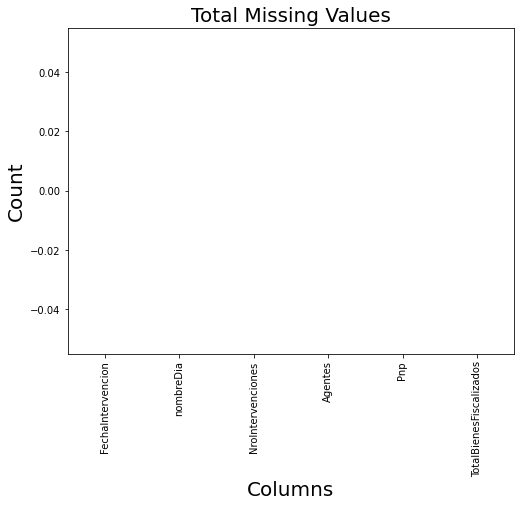

In [23]:
total = data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

As the plot show the data set has no missing values

### *Analyze the outliners*

<AxesSubplot:>

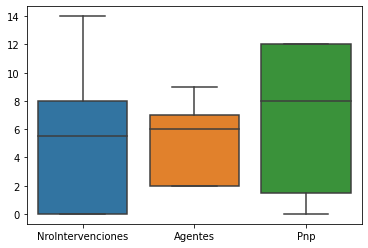

In [24]:
sns.boxplot(data=data[['NroIntervenciones','Agentes','Pnp']])

<AxesSubplot:>

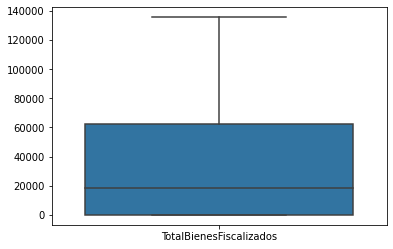

In [25]:
sns.boxplot(data=data[['TotalBienesFiscalizados']])

Analyzing the numeric data we can see that only the column of TotalBienesFiscalizados has outliner the strategy for them in replace with the mean

In [26]:
datamean=data['TotalBienesFiscalizados'].mean()
data.loc[data['TotalBienesFiscalizados']>100000]


,FechaIntervencion,nombreDia,NroIntervenciones,Agentes,Pnp,TotalBienesFiscalizados
5,2020-02-11,MARTES,8,8,8.0,112240
16,2020-03-03,MARTES,8,4,0.0,135520


In [27]:
data['TotalBienesFiscalizados']=data['TotalBienesFiscalizados'].replace(112240,datamean)
data['TotalBienesFiscalizados']=data['TotalBienesFiscalizados'].replace(135520,datamean)
data.loc[data['TotalBienesFiscalizados']>100000]

,FechaIntervencion,nombreDia,NroIntervenciones,Agentes,Pnp,TotalBienesFiscalizados


the outliners were identified and replaced

### *Formating the date*

In [28]:
data['FechaIntervencion']=pd.to_datetime(data['FechaIntervencion'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   FechaIntervencion        32 non-null     datetime64[ns]
 1   nombreDia                32 non-null     object        
 2   NroIntervenciones        32 non-null     int64         
 3   Agentes                  32 non-null     int64         
 4   Pnp                      32 non-null     float64       
 5   TotalBienesFiscalizados  32 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.6+ KB


### *One-hot Encoding*  
Convert categorical strings in series

In [29]:
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))
num_ohc_cols.index

/var/folders/23/klrkvnd11zx4983l2r_j6bsc0000gn/T/ipykernel_711/1034190154.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.object


Index(['nombreDia'], dtype='object')

In [30]:
data_ohc = data.copy()
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)
    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))
    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)
    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)




/var/folders/23/klrkvnd11zx4983l2r_j6bsc0000gn/T/ipykernel_711/2642824450.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat = le.fit_transform(data_ohc[col]).astype(np.int)


In [31]:
data_ohc.head()

,FechaIntervencion,NroIntervenciones,Agentes,Pnp,TotalBienesFiscalizados,nombreDia_0,nombreDia_1,nombreDia_2,nombreDia_3,nombreDia_4,nombreDia_5,nombreDia_6
0,2020-02-03,5,9,12.0,55031.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2020-02-04,4,7,12.0,220.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2020-02-05,6,6,10.0,24707.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2020-02-06,6,6,12.0,37632.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-10,6,7,12.0,29032.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


For this analysis is note relevant de date but the day of week yes, so the FEchaIntervencion column is deleted

In [32]:
data_ohc=data_ohc.drop(['FechaIntervencion'],axis=1)
data_ohc.head()

,NroIntervenciones,Agentes,Pnp,TotalBienesFiscalizados,nombreDia_0,nombreDia_1,nombreDia_2,nombreDia_3,nombreDia_4,nombreDia_5,nombreDia_6
0,5,9,12.0,55031.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4,7,12.0,220.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6,6,10.0,24707.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6,6,12.0,37632.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,6,7,12.0,29032.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The dataset is ready to implement the lineal regression

## 4. **Fit de model**

### *Split the data*

First the precited column is NroAgentes, so lets split that and create the trainning and test data sets

In [33]:
y_col='Agentes'
features_cols=[x for x in data_ohc.columns if x!= y_col]
X_data=data_ohc[features_cols]
y_data=data_ohc[y_col]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                    test_size=0.3, random_state=42)

In [35]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

*Implement linear regression*

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR =LinearRegression()

LR=LR.fit(X_train,y_train)
y_train_pred=LR.predict(X_train)
y_test_pred=LR.predict(X_test)

linearRegression_rmse=rmse(y_test,y_test_pred)
print(linearRegression_rmse)

1.8691553030705124


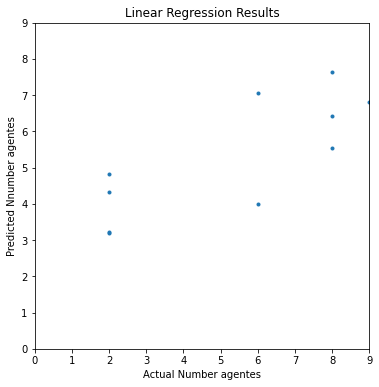

In [37]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_test_pred, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Number agentes', 
       ylabel='Predicted Nnumber agentes', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

*Implement Ridge regression*

In [38]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV =RidgeCV(alphas=alphas,cv=4)

ridgeCV=ridgeCV.fit(X_train,y_train)
y_train_pred_r=ridgeCV.predict(X_train)
y_test_pred_r=ridgeCV.predict(X_test)

ridgeCV_rmse=rmse(y_test,y_test_pred_r)
print(ridgeCV.alpha_, ridgeCV_rmse)

1.0 1.8623209881756093


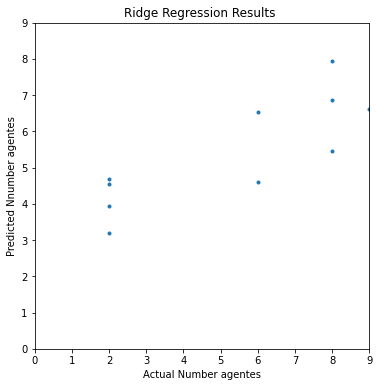

In [40]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_test_pred_r, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Number agentes', 
       ylabel='Predicted Nnumber agentes', 
       xlim=lim,
       ylim=lim,
       title='Ridge Regression Results ');

*Implement Lasso regression*

In [43]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([0.005, 0.05,1,5,20,50,80,100,120,140])

lassoCV =LassoCV(alphas=alphas2,cv=4,max_iter=54)

lassoCV=lassoCV.fit(X_train,y_train)
y_train_pred_l=lassoCV.predict(X_train)
y_test_pred_l=lassoCV.predict(X_test)

lassoCV_rmse=rmse(y_test,y_test_pred_l)
print(lassoCV.alpha_, lassoCV_rmse)

0.05 1.9022063008543815


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.391755043070168, tolerance: 0.007443750000000001
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.766719946505624, tolerance: 0.005823529411764706
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5941740287838755, tolerance: 0.006294117647058823
  model = cd_fast.ene

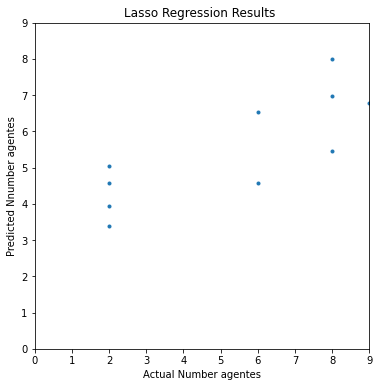

In [44]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_test_pred_l, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Number agentes', 
       ylabel='Predicted Nnumber agentes', 
       xlim=lim,
       ylim=lim,
       title='Lasso Regression Results ');

*Implement Elastic regression*

In [45]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV =ElasticNetCV(alphas=alphas2,cv=4,max_iter=14)

elasticNetCV=elasticNetCV.fit(X_train,y_train)
y_train_pred_e=elasticNetCV.predict(X_train)
y_test_pred_e=elasticNetCV.predict(X_test)

elasticNetCV_rmse=rmse(y_test,y_test_pred_e)
print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.05 0.5 1.854096916778553


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.27111358119328, tolerance: 0.007443750000000001
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.360779376664703, tolerance: 0.007443750000000001
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.47015712853975, tolerance: 0.00749375
  model = cd_fast.enet_coordinate

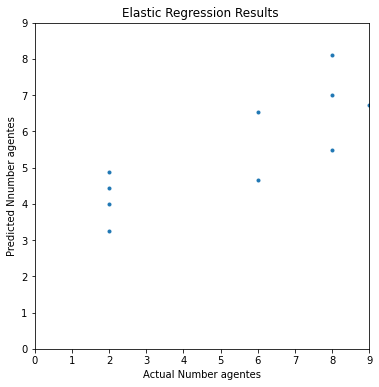

In [46]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_test_pred_e, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Number agentes', 
       ylabel='Predicted Nnumber agentes', 
       xlim=lim,
       ylim=lim,
       title='Elastic Regression Results ');

In [48]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,1.869155
Ridge,1.862321
Lasso,1.902206
ElasticNet,1.854097


In [49]:
coefficients = pd.DataFrame()
coefficients['linear regression'] = LR.coef_
coefficients['ridge regression'] = ridgeCV.coef_
coefficients['lasso regression'] = lassoCV.coef_
coefficients['elastic regression'] = elasticNetCV.coef_
coefficients = coefficients.applymap(abs)

coefficients.describe()

,linear regression,ridge regression,lasso regression,elastic regression
count,10.000000,10.000000,10.000000,10.000000
mean,0.944733,0.587256,0.484520,0.508217
std,0.699146,0.433942,0.586096,0.470309
min,0.000017,0.000021,0.000000,0.000021
25%,0.312677,0.224137,0.109681,0.188064
50%,1.019194,0.515434,0.219590,0.358839
75%,1.418067,0.972945,0.614508,0.815803
max,2.109748,1.172196,1.552046,1.282630


In [50]:
(coefficients>0).sum()

linear regression     10
ridge regression      10
lasso regression       9
elastic regression    10
dtype: int64

In [51]:
coefficients

,linear regression,ridge regression,lasso regression,elastic regression
0,0.078136,0.166896,0.169374,0.183280
1,0.138731,0.188692,0.206208,0.202416
2,0.000017,0.000021,0.000018,0.000021
3,2.109748,1.172196,1.504662,1.216934
4,0.834513,0.330473,0.000000,0.033919
5,1.481199,1.038312,0.683949,0.908962
6,1.070838,0.612847,0.089783,0.372665
7,1.228673,0.776845,0.232972,0.536326
8,0.967551,0.418021,0.406183,0.345014
9,1.537925,1.168260,1.552046,1.282630
